### Develop LSTM Models For Univariate Time Series Forecasting

In [1]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features # 0+3=3
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:
X.shape

(6, 3)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1 #this is not x feature, we use it to convert in 3D
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [7]:
X

array([[[110],
        [125],
        [133]],

       [[125],
        [133],
        [146]],

       [[133],
        [146],
        [158]],

       [[146],
        [158],
        [172]],

       [[158],
        [172],
        [187]],

       [[172],
        [187],
        [196]]])

### Building LSTM Model

In [8]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)


C:\Users\DELL\anaconda3\envs\tensflow\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 31920.4629
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 31620.9551
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 31341.1875
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 31098.6074
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 30883.2168
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 30666.2344
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 30432.7812
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 30163.1426
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 29821.1855
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 29359.2598
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 28756.7832
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 28025.6816
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 27181.7754
Epoch 14/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 26317.3965
Epoch 15/300
1/1 ━━━━━━━━━━━━━━

### Predicting For the next 10 data

In [10]:
from array import array

In [13]:
x_input = np.array([187, 196, 210])

In [14]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[221.62445]


TypeError: array() argument 1 must be a unicode character, not list

In [101]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [102]:
len(timeseries_data)

9

In [84]:
lst_output

[207.60309,
 219.40913,
 232.47244,
 249.33023,
 263.42752,
 279.1716,
 296.92273,
 313.7915,
 332.32684,
 352.21432]

In [75]:
lst

[170, 180, 190]

### Visualizaing The Output

In [38]:
import matplotlib.pyplot as plt

In [89]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

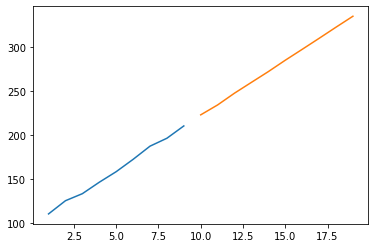

In [103]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
